In [1]:
using  Plots, LaTeXStrings
include("..\\Code_jail\\Master_func.jl")

SpecialFunction (generic function with 1 method)

# We aim to approximate
$$
I = \int_{-\infty}^{\infty}e^{ik x - \omega(k)t}\hat{q}_0(k)\mathrm{d}k.
$$
Note that if we have
$$
\tilde{q}(x) = q(φ^{-1}(x)), \text{ with }\tilde{q}:[-1,1]\to\mathbb{R}\text{ and } \varphi^{-1}:[-1,1]\to[0,L]: x ↦ \frac{L}{2}(x+1),
$$
then
$$
\mathcal{F}(q)[k] = \frac{L}{2}e^{-ik\frac{L}{2}} \mathcal{F}(\tilde{q})\left[\frac{L}{2}k\right].
$$
Thus, doing the decomposition of $\tilde{q}$ and mapping back, we get
where 
\begin{align*}
\hat{q}_0(k) &= \frac{L}{2}e^{-ik\frac{L}{2}}\int_{-1}^1 e^{-ixk\frac{L}{2}}\tilde{q}(x)\mathrm{d}x = \frac{L}{2}e^{-ik\frac{L}{2}}\left(\sum_{j=0}^{N-1} -\left(\frac{2}{ikL}\right)^{j+1}\left[\tilde{q}^{(j)}(x)e^{-ik\frac{L}{2}x}\right]_{-1}^1 + \left(\frac{2}{ikL}\right)^{N}\int_{-1}^1\tilde{q}^{(N)}(x)e^{-ik\frac{L}{2}x}\mathrm{d}x\right).\\
&= \sum_{j=0}^{N-1} -\left(\frac{2}{L}\right)^{j}\left(\frac{1}{ik}\right)^{j+1}\left[\tilde{q}^{(j)}(x)e^{-ik\frac{L}{2}(x+1)}\right]_{-1}^1 + \left(\frac{2}{L}\right)^{N-1}\left(\frac{1}{ik}\right)^{N}\int_{-1}^1\tilde{q}^{(N)}(x)e^{-ik\frac{L}{2}(x+1)}\mathrm{d}x
\end{align*}
Then define
$$
I_m(x,t) = \int_{-\infty}^{\infty}e^{ik x - \omega(k)t}(ik)^{-m}\mathrm{d}k
$$
We then have that the integral becomes
$$
I = \sum_{j=0}^{N-1} \left(\frac{2}{L}\right)^{j}\left(\tilde{q}^{(j)}(-1)I_{j+1}(x,t)-\tilde{q}^{(j)}(1)I_{j+1}(x-L,t)\right) + \left(\frac{2}{L}\right)^{N-1}\int_{-1}^{1}\tilde{q}^{(N)}(s)I_N\left(x-\frac{L}{2}(s+1),t\right)\mathrm{d}s.
$$


In [2]:
function First_Int(w,x,t,f,N,L)
    Res = 0; 
    SF = (m,x,t) -> SpecialFunction(w, x, t, -m, 300); #SF = ∫exp(ixt-w(k)t)*(ik)^m
    for i1 = 0:(N-1)
        Res += (2/L)^i1*(f(-1)*SF(i1+1,x,t)-f(1)*SF(i1+1,x-L,t));
        f = Diff(f);
    end
    s = curv(x->x,-1,1,x->1,1000)
    Res += (2/L)^(N-1)*Clen_Curt(z -> f.(z).*SF.(N,x-L/2*(z+1),t),s)
    return Res
end

First_Int (generic function with 1 method)

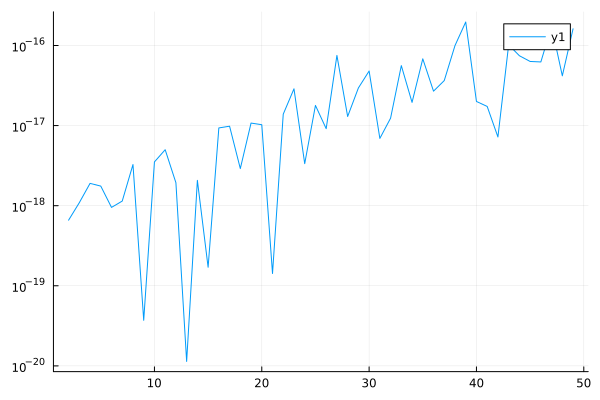

48-element Vector{ComplexF64}:
   6.589315466434655e-19 - 1.0036419253195681e-21im
  1.0895494024249218e-18 - 4.045309447619193e-22im
  1.8980361225893182e-18 - 4.908535428869187e-22im
    1.75582951356279e-18 - 5.371471687125501e-23im
   9.519809767602057e-19 - 8.145536094471994e-23im
   1.141766259657431e-18 - 3.3412749129553055e-24im
  3.2636926910540524e-18 - 6.147068586619949e-24im
  -3.707230211565948e-20 - 1.1942961020562752e-25im
  3.5178642623701414e-18 - 2.590421764465047e-25im
   4.996486165699316e-18 - 2.765509270348544e-27im
 -1.9340292331176585e-18 - 6.91508719094668e-27im
  1.1366416601233463e-20 - 4.484016789369851e-29im
  2.0703085306498933e-18 - 1.2702222853070307e-28im
                         ⋮
   9.966837528030891e-17 + 5.776454471579173e-32im
  1.9636982051027515e-16 + 1.211658199426465e-31im
  -2.000231104238572e-17 - 1.6106529555418918e-32im
  1.7333978084014536e-17 + 8.083827630830838e-33im
   7.204662033064698e-18 + 1.3167417520170936e-33im
 -1.017824563739710

In [16]:
w =  [1];
x = 1;
t = .00001;
N_ult = 50;
L = 2;
ψ = x -> (x+1)*L/2;
ϕ = x -> 2/L*x-1;
f = x -> sin(pi*x);
ff = UltraFun(0,x -> f(ψ(x)),N_ult);
N = 2;
rel_res = First_Int(w,x,t,ff,N,L)

err = zeros(length(2:N_ult-1))*1im
NN = 2:N_ult-1
for N_ulti = NN
    ff = UltraFun(0,x -> f(ψ(x)),N_ulti);
    err[N_ulti-1] = First_Int(w,x,t,ff,N,L) - rel_res 
end
plot(NN,abs.(err),yaxis =:log)|>display
err|>display


In [19]:
w =  [1];
x = 1;
t = 1;
N_ult = 100;
L = 2;
ψ = x -> (x+1)*L/2;
ϕ = x -> 2/L*x-1;
f = x -> sin(pi*x);
ff = UltraFun(0,x -> f(ψ(x)),N_ult);
N = 4;
rel_res = First_Int(w,x,t,ff,N,L)

int1 = (g,k,x,t) -> exp(1im*k*x-k^2*t)*g(k)
g = k -> -(π*(1-exp.(-2im*k)))/(k^2 .- π^2)

s = curv(x -> x,-100,100, x ->  1, 20000, 0, 0 )
Clen_Curt(k -> int1(g,k,x,t),s) - rel_res

4.176872787454636e-12 + 2.6442180084055023e-12im

In [20]:
Clen_Curt(k -> int1(g,k,x,t),s)|>display
rel_res|>display

6.7505743563551956e-18 - 1.1102230246251565e-16im

-4.17686603688028e-12 - 2.644329030707965e-12im

3.0604046680338626 - 7.975091868469157e-15im

Let's say we have that case where $L=2$ and $q=\sin(π x)$. We then have that $\hat{q}=\frac{π (e^{-2ik}-1)}{k^2-\pi^2}$. We then want to evaluate
\begin{align*}
\int_{-\infty}^∞ e^{ikx-k^2t}\frac{π (e^{-2ik}-1)}{k^2-\pi^2}\mathrm{d}k &= \int_{-\infty}^∞ \left(e^{ik(x-2)-k^2t}-e^{ikx-k^2t}\right)\frac{π}{(k-\pi)(k+π)}\mathrm{d}k\\
&= \frac{1}{2}\int_{-\infty}^∞ \left(e^{ik(x-2)-k^2t}-e^{ikx-k^2t}\right)\left(\frac{1}{k-π}-\frac{1}{k+π}\right)\mathrm{d}k\\
&= \frac{1}{2}\int_{-\infty}^∞ \frac{e^{ik(x-2)-k^2t}-e^{ikx-k^2t}}{k-π}\mathrm{d}k-\frac{1}{2}\int_{-\infty}^∞ \frac{e^{ik(x-2)-k^2t}-e^{ikx-k^2t}}{k+π}\mathrm{d}k\\
&= \frac{1}{2}\int_{-\infty}^∞ \frac{e^{i(k+\pi)(x-2)-(k+\pi)^2t}-e^{i(k+\pi)x-(k+\pi)^2t}}{k}\mathrm{d}k-\frac{1}{2}\int_{-\infty}^∞ \frac{e^{i(k-π)(x-2)-(k-π)^2t}-e^{(k-π)x-(k-π)^2t}}{k}\mathrm{d}k\\
&= \frac{e^{i\pi(x-2)-\pi^2t}}{2}iI_{1}(x-2+2πti,t)-\frac{e^{iπx-\pi^2t}}{2}iI_{1}(x+2πti,t)\\&~~~~-\frac{e^{-i\pi(x-2)-\pi^2t}}{2}iI_{1}(x-2-2πti,t)+\frac{e^{-iπx-\pi^2t}}{2}iI_{1}(x-2πti,t)
\end{align*}

In [6]:
w = [1];
SF = (x,t) -> SpecialFunction(w, x, t, -1, 300);
Solu = (x,t) -> exp(1im*pi*(x-2)-pi^2*t)/2*1im*SF(x-2+2im*pi*t,t) - exp(1im*pi*x-pi^2*t)/2*1im*SF(x+2im*pi*t,t)-exp(-1im*pi*(x-2)-pi^2*t)/2*1im*SF(x-2-2im*pi*t,t) + exp(-1im*pi*x-pi^2*t)/2*1im*SF(x-2im*pi*t,t);
Solu(1,1)

LoadError: MethodError: no method matching zero(::Type{Any})

[0mClosest candidates are:
[0m  zero(::Type{Union{Missing, T}}) where T
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:105[24m[39m
[0m  zero([91m::Union{Type{P}, P}[39m) where P<:Dates.Period
[0m[90m   @[39m [36mDates[39m [90mC:\Users\wiets\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\Dates\src\[39m[90m[4mperiods.jl:51[24m[39m
[0m  zero([91m::UniformScaling{T}[39m) where T
[0m[90m   @[39m [32mLinearAlgebra[39m [90mC:\Users\wiets\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\[39m[90m[4muniformscaling.jl:135[24m[39m
[0m  ...


In [ ]:
SF(1,1)|>display
SF(1-2+2im*pi*1,1)|>display

-1.5063940612579414 - 4.440892098500626e-16im

LoadError: MethodError: no method matching zero(::Type{Any})

[0mClosest candidates are:
[0m  zero(::Type{Union{Missing, T}}) where T
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:105[24m[39m
[0m  zero([91m::Union{Type{P}, P}[39m) where P<:Dates.Period
[0m[90m   @[39m [36mDates[39m [90mC:\Users\wiets\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\Dates\src\[39m[90m[4mperiods.jl:51[24m[39m
[0m  zero([91m::UniformScaling{T}[39m) where T
[0m[90m   @[39m [32mLinearAlgebra[39m [90mC:\Users\wiets\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\[39m[90m[4muniformscaling.jl:135[24m[39m
[0m  ...
